<a href="https://colab.research.google.com/github/Alexanderdivv/Rock-Papper-Scissors/blob/main/RockScissorsPapper_AlexanderDGBangun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock Scissors Papper
By:
Alexander Diva Grael Bangun<br>
Belajar Machine Learning Untuk Pemula 2021<br>
email: alexanderdivagraelbangun@gmail.com


In [1]:
#import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split

In [2]:
#import dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-29 04:53:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.10MB/s    in 5m 48s  

2021-05-29 04:59:22 (905 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#ekstrak dataset
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#separate dataset
import shutil
original = [(r'/tmp/rockpaperscissors/paper'), (r'/tmp/rockpaperscissors/rock'), (r'/tmp/rockpaperscissors/scissors')]
target = [(r'/tmp/images/paper'), (r'/tmp/images/rock'), (r'/tmp/images/scissors')]

for i in range(len(target)):
  shutil.move(original[i],target[i])

In [5]:
#pathing dataset
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir,'train')
validate_dir = os.path.join(base_dir, 'val')

In [6]:
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

#creating directory for data
os.mkdir(train_dir)
os.mkdir(validate_dir)

#join each dir and seperate to val and train 

In [7]:
#set validation data size dan split semua kategori
train_rock_dir, validate_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_scissors_dir, validate_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
train_paper_dir, validate_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [8]:
#set dir untuk semua katergoti di tiap direktori 
train_rock = os.path.join(train_dir, 'rock')
validate_rock = os.path.join(validate_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
validate_paper = os.path.join(validate_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
validate_scissors = os.path.join(validate_dir, 'scissors')

#buat direktori
os.mkdir(train_rock)
os.mkdir(validate_rock)
os.mkdir(train_scissors)
os.mkdir(validate_scissors)
os.mkdir(train_paper)
os.mkdir(validate_paper)

In [9]:
#untuk cut file
for gambar in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, gambar), os.path.join(train_rock, gambar))

for gambar in validate_rock_dir:
  shutil.copy(os.path.join(rock_dir, gambar), os.path.join(validate_rock, gambar))
  
for gambar in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, gambar), os.path.join(train_scissors, gambar))

for gambar in validate_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, gambar), os.path.join(validate_scissors, gambar))

for gambar in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, gambar), os.path.join(train_paper, gambar))

for gambar in validate_paper_dir:
  shutil.copy(os.path.join(paper_dir, gambar), os.path.join(validate_paper, gambar))

In [10]:
print(len(os.listdir('/tmp/images/train/paper')))
print(len(os.listdir('/tmp/images/train/scissors')))
print(len(os.listdir('/tmp/images/train/rock')))

print(len(os.listdir('/tmp/images/val/paper')))
print(len(os.listdir('/tmp/images/val/scissors')))
print(len(os.listdir('/tmp/images/val/rock')))


427
450
435
285
300
291


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range = 0.2,
    horizontal_flip=True)

validate_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range = 0.2,
    horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(150, 150), 
                                               color_mode='rgb',
                                               batch_size=32, 
                                               class_mode='categorical',
                                               shuffle=True,) 

validate_data = validate_datagen.flow_from_directory(validate_dir, 
                                           target_size=(150, 150), 
                                           color_mode='rgb',
                                           batch_size=32, 
                                           class_mode='categorical',
                                           shuffle=False)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
#loss function, menggunakan Adam untuk optimizer,metric
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])


In [15]:
#running model dengan fit
running = model.fit(train_data,
                    steps_per_epoch = 30,
                    epochs = 20,
                    validation_data = validate_data,
                    validation_steps = 5,
                    verbose = 1)

Epoch 1/20
30/30 [==============================] - 35s 1s/step - loss: 1.0772 - accuracy: 0.3698 - val_loss: 0.9402 - val_accuracy: 0.6938
Epoch 2/20
30/30 [==============================] - 34s 1s/step - loss: 0.6034 - accuracy: 0.7552 - val_loss: 0.4728 - val_accuracy: 0.8562
Epoch 3/20
30/30 [==============================] - 34s 1s/step - loss: 0.2886 - accuracy: 0.9000 - val_loss: 0.4917 - val_accuracy: 0.8438
Epoch 4/20
30/30 [==============================] - 35s 1s/step - loss: 0.2274 - accuracy: 0.9281 - val_loss: 0.4087 - val_accuracy: 0.8938
Epoch 5/20
30/30 [==============================] - 34s 1s/step - loss: 0.2144 - accuracy: 0.9208 - val_loss: 0.7023 - val_accuracy: 0.6938
Epoch 6/20
30/30 [==============================] - 34s 1s/step - loss: 0.1682 - accuracy: 0.9406 - val_loss: 0.3230 - val_accuracy: 0.9062
Epoch 7/20
30/30 [==============================] - 34s 1s/step - loss: 0.1279 - accuracy: 0.9573 - val_loss: 0.0817 - val_accuracy: 0.9625
Epoch 8/20
30/30 [==

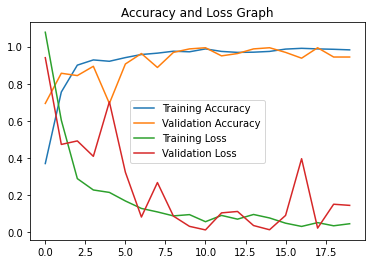

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(plt.plot(running.history['accuracy'], 
               label='Training Accuracy'))
plt.plot(running.history['val_accuracy'],
         label='Validation Accuracy')
plt.plot(running.history['loss'],
         label='Training Loss')
plt.plot(running.history['val_loss'],
         label='Validation Loss')
plt.title('Accuracy and Loss Graph')
plt.legend()
plt.show()

Saving test.png to test.png
{'test.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xd7\x00\x00\x00\xdb\x08\x06\x00\x00\x00\xfe\xbf\x04\xce\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^\\\xfdw\x90gY\x96\x1f\xf6\xdd\xf2\x95\xde\x97\xb7\xed}\xf7\xf4L\xcf\x8e\x9f5X\x83\x01\xb0\x18.\x04\x80\x00\x17\xb1 \x81%!Q\x86A*\xa4\x10E\x89M\n\x7fP`0$2B\x8c`\x90\x10A\x12\x80(B\x14\x01\x11\x8b\x85[`\xb1\xc0\xec\xee\xcc\xceN\x8f\xef\x9e\xb6\xe5]feVeVUVe\x99\xd4\xf7s\xee\xef\xd54x\xb3^\xfd~\xbf\xf7\xee=\xf7\xf8s\xaey\xef\xed\xd8\xbd4\xbd\xbds\xe7\xae\xb6\xa3\xb5\xf6\xe8\xd1\xa3\xb6\xbd\x9d#\xdfw\xee\xd8\xd9v\xec\xd8\xd1v\xec\xdc\xd1\xee\xdf\xbf_\xbfw\xef\xde\xdd\xeem\xddk;w\xeel\xbbvi\xb3\xa3=J}\xed\x1e>|X\xd7\xd5\xdb\xde\xde\xaev;\xf2}W\xeanmm\xd59\x9d\xa8\xb3\xfdh\xbb\xda\x81\xaf\xbe\xb2u\x7f\xab`\x0e\xfd\x82\xa9\xe8\x0b>\x8f\x02\xbf\xfa\xd8\xb3\xbb\xfaU\xfc\xde\xb9K\x

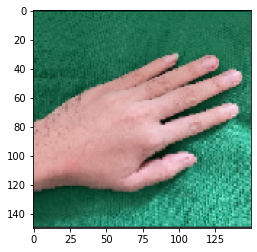

In [17]:
#testing
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

test_image = files.upload()

for fUploaded in test_image.keys():
  #melakukan prediksi
  path = fUploaded
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  kategori = model.predict(images, batch_size=10)

  print(test_image)
  if kategori[0][0] == 1:
    print('Paper')
  elif kategori[0][1] == 1:
    print('Rock')
  else:
    print('Scissors')


In [20]:
#change file to keras
from keras.models import Sequential
from keras.layers import Dense

model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
from keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
# dimensions of our images
img_width, img_height = 150, 150
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [24]:
# predicting images
img = image.load_img('test3.png', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [25]:
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[2]


#notes
1. dataset yang digunakan: 
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
2. pembagian dataset: train set & validation set
3. data validation 40%, jumlah keseluruhan data = 2188 (874 data validasi, 1314 data training)
4. menggunakan image data generator
  mengimplementasikan augmentasi gambar
  model sequential
  train model <= 30 menit
  akurasi >= 85%
5. menambah data diri pada submission

6. menggunakan > 1 hidden layer
7. menerapkan lebih banyak augmentasi gambar
8. menggunakan optimizer dan loss-function
  loss-function menggunakan categorical entropy